In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd
import numpy as np
# Get the QQQ ticker object
ticker = yf.Ticker("QQQ")

# Get the historical market data for the ticker
df = ticker.history(period="1y")


In [10]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, subplot_titles=('QQQ', 'slider','Volume'), 
               row_width=[1, 2, 3])

fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']),row=1, col=1
                #layout=go.Layout(shapes=[go.layout.Shape(type='rect',x0='2022-06-23',y0=260,x1='2022-06-24',y1=300,xref='x',yref='y')])
                )

fig.add_trace(go.Bar(x=df.index, y=df['Volume']), row=3, col=1)
#fig.add_trace(go.Line(x=df.index,y=df['Open']+np.gradient(df['Open'])))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [3]:
candle_df=df.drop(['Dividends','Stock Splits','Capital Gains'], axis='columns')

In [4]:
import torch
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
transformed_open_candles = scaler.fit_transform(candle_df['Open'].values.reshape(-1,1))

In [5]:
df.index.values.reshape(-1,1).shape,transformed_open_candles.shape

((21, 1), (21, 1))

In [6]:

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=np.linspace(start=0, stop=len(transformed_open_candles)-1, num=len(transformed_open_candles)),y=transformed_open_candles.squeeze()))
fig.add_trace(go.Scatter(x=np.linspace(start=0, stop=len(transformed_open_candles)-1, num=len(df['Open'])), y=df['Open']), secondary_y=True)
fig.show()

In [7]:
np.linspace(start=0, stop=len(transformed_open_candles)-1, num=len(transformed_open_candles)).shape
transformed_open_candles.shape

(21, 1)

<h2> Pre-Processing </h2>
<h4> This section is just to test the pre-processing pipeline and ideally once it is ready we can make a python 
script that takes in a stock dataframe over N years and outputs all the images over some time window </h4>

In [137]:
import mplfinance as mpf
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import mapt
# Get the QQQ ticker object
ticker = yf.Ticker("QQQ")

# Get the historical market data for the ticker
df = ticker.history(period="1d", interval='15m') #start='2020-01-23', end='2020-02-23')
candle_df=df.drop(['Dividends','Stock Splits','Capital Gains'], axis='columns')


#https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb :: For style info
# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',figratio=(11,8),figscale=0.85)#volume=True, #type='ohlc'
mc = mpf.make_marketcolors(up='g',down='r',edge='black',
                           wick={'up':'white','down':'white'},
                           volume='gray',ohlc='white')
s  = mpf.make_mpf_style(marketcolors=mc, facecolor='black', figcolor='black', gridstyle='None', edgecolor='white')
mpf.plot(candle_df,**kwargs,style=s, savefig='testsave.png')




<h2> Autoencoder CNN pattern clustering</h2>
<h4> This section implements the autoencoder model and the CNN</h4>

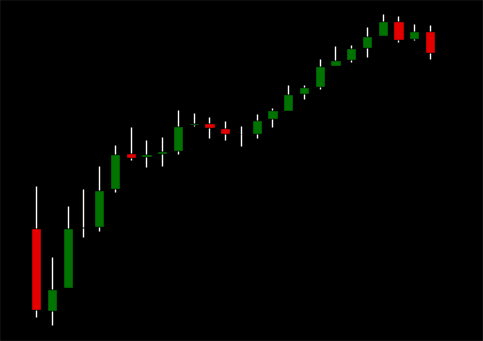

In [139]:
from PIL import Image

# Opens a image in RGB mode
im = Image.open("testsave.png")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image

# Cropped image of above dimension
# (It will not change original image)
#(left=0, upper=0, right=width,lower=height) 
im1 = im.crop( (122,59,width-67, height-88))
#im1 = im.crop( (121,58,width-66, height-87))
im1



In [19]:
Candle_type='candle'

%run pre-processor.py --candle_type $Candle_type

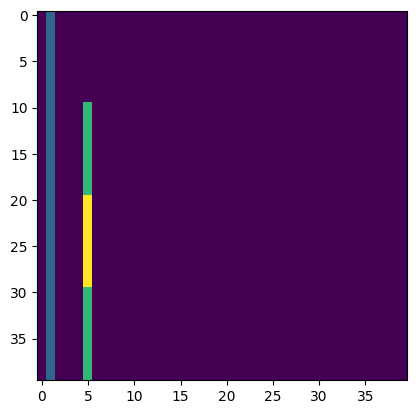

In [9]:
import numpy as np
import matplotlib.pyplot as plt
zeros=np.zeros((40,40))
zeros[:,1]=1
zeros[20:30,5]=3
zeros[10:20,5]=2
zeros[30:40,5]=2
plt.imshow(zeros)